### Problem Statement: Prediction of house prices

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [9]:
mydata = pd.read_csv('HousePrices.csv')

In [10]:
mydata.head(5).transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [15]:
mydata.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [12]:
print("\nLot Frontage:->\n")
print("Mean: ",np.mean(mydata["LotFrontage"]))
print("Mode: ",stats.mode(mydata["LotFrontage"])[0])
print("Median: ",np.median(mydata["LotFrontage"]))


Lot Frontage:->

Mean:  70.04995836802665
Mode:  [60.]
Median:  nan


In [16]:
mydata["LotFrontage"].fillna(mydata["LotFrontage"].mode()[0],inplace=True)
mydata["MSZoning"] = le.fit_transform(mydata["MSZoning"])
mydata["Street"] = le.fit_transform(mydata["Street"])
mydata["Alley"] = le.fit_transform(mydata["Alley"])
mydata["LotShape"] = le.fit_transform(mydata["LotShape"])
mydata["LandContour"] = le.fit_transform(mydata["LandContour"])
mydata["Utilities"] = le.fit_transform(mydata["Utilities"])
mydata["LotConfig"] = le.fit_transform(mydata["LotConfig"])
mydata["LandSlope"] = le.fit_transform(mydata["LandSlope"])
mydata["Neighborhood"] = le.fit_transform(mydata["Neighborhood"])
mydata["Condition1"] = le.fit_transform(mydata["Condition1"])
mydata["Condition2"] = le.fit_transform(mydata["Condition2"])
mydata["BldgType"] = le.fit_transform(mydata["BldgType"])
mydata["HouseStyle"] = le.fit_transform(mydata["HouseStyle"])
mydata["RoofStyle"] = le.fit_transform(mydata["RoofStyle"])
mydata["RoofMatl"] = le.fit_transform(mydata["RoofMatl"])
mydata["Exterior1st"] = le.fit_transform(mydata["Exterior1st"])
mydata["Exterior2nd"] = le.fit_transform(mydata["Exterior2nd"])
mydata["MasVnrType"] = le.fit_transform(mydata["MasVnrType"])
mydata["ExterQual"] = le.fit_transform(mydata["ExterQual"])
mydata["ExterCond"] = le.fit_transform(mydata["ExterCond"])
mydata["Foundation"] = le.fit_transform(mydata["Foundation"])
mydata["BsmtQual"] = le.fit_transform(mydata["BsmtQual"])
mydata["BsmtCond"] = le.fit_transform(mydata["BsmtCond"])
mydata["BsmtExposure"] = le.fit_transform(mydata["BsmtExposure"])
mydata["BsmtFinType1"] = le.fit_transform(mydata["BsmtFinType1"])
mydata["BsmtFinType2"] = le.fit_transform(mydata["BsmtFinType2"])
mydata["Heating"] = le.fit_transform(mydata["Heating"])
mydata["HeatingQC"] = le.fit_transform(mydata["HeatingQC"])
mydata["CentralAir"] = le.fit_transform(mydata["CentralAir"])
mydata["Electrical"] = le.fit_transform(mydata["Electrical"])
mydata["KitchenQual"] = le.fit_transform(mydata["KitchenQual"])
mydata["Functional"] = le.fit_transform(mydata["Functional"])
mydata["FireplaceQu"] = le.fit_transform(mydata["FireplaceQu"])
mydata["GarageType"] = le.fit_transform(mydata["GarageType"])
mydata["GarageFinish"] = le.fit_transform(mydata["GarageFinish"])
mydata["GarageQual"] = le.fit_transform(mydata["GarageQual"])
mydata["GarageCond"] = le.fit_transform(mydata["GarageCond"])
mydata["PavedDrive"] = le.fit_transform(mydata["PavedDrive"])
mydata["PoolQC"] = le.fit_transform(mydata["PoolQC"])
mydata["Fence"] = le.fit_transform(mydata["Fence"])
mydata["MiscFeature"] = le.fit_transform(mydata["MiscFeature"])
mydata["SaleType"] = le.fit_transform(mydata["SaleType"])
mydata["SaleCondition"] = le.fit_transform(mydata["SaleCondition"])
mydata["GarageYrBlt"] = le.fit_transform(mydata["GarageYrBlt"])
mydata["MasVnrArea"] = le.fit_transform(mydata["MasVnrArea"])

<AxesSubplot:>

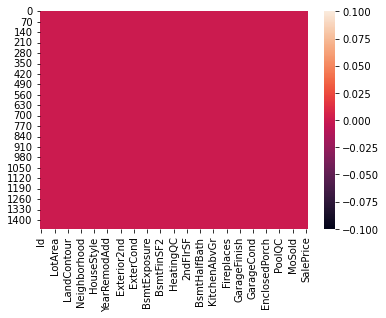

In [17]:
plt.figure()
sns.heatmap(mydata.isnull())

In [18]:
x = mydata.drop(['SalePrice'], axis=1)
y = mydata[['SalePrice']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [20]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [21]:
reg_model.score(x_train, y_train)

0.8413207666178185

In [22]:
reg_model.score(x_test, y_test)

0.8308440388026631